## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
smice_df=pd.merge(mouse_metadata,study_results, on="Mouse ID",how="outer")

# Display the data table for preview
smice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count=len(smice_df["Mouse ID"])
mouse_count

1893

In [3]:
# Gettingdmouse the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dmouse_df = smice_df[smice_df.duplicated(['Mouse ID', 'Timepoint'])]

dmouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
damouse_df = smice_df[smice_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]
damouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
csmice_df=smice_df.drop_duplicates(['Mouse ID', 'Timepoint'],keep="first")

In [6]:
# Checking the number of mice in the clean DataFrame.
mous_count=len(csmice_df["Mouse ID"])
mous_count

1888

## Summary Statistics

In [7]:
Regimen=list(smice_df["Drug Regimen"].unique())
Regimen

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [8]:
Average=[csmice_df.loc[csmice_df["Drug Regimen"]==x,"Tumor Volume (mm3)"].mean() for x in Regimen]
Med=[csmice_df.loc[csmice_df["Drug Regimen"]==x,"Tumor Volume (mm3)"].median() for x in Regimen]
Variance=[csmice_df.loc[csmice_df["Drug Regimen"]==x,"Tumor Volume (mm3)"].var() for x in Regimen]
SD=[csmice_df.loc[csmice_df["Drug Regimen"]==x,"Tumor Volume (mm3)"].std() for x in Regimen]
SM=[csmice_df.loc[csmice_df["Drug Regimen"]==x,"Tumor Volume (mm3)"].sem() for x in Regimen]

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Sumstat_df=pd.DataFrame({"Regimen":Regimen,"Mean":Average,"Median":Med,"Standard Deviation":SD,
                        "SEM":SM})
Sumstat_df


,Regimen,Mean,Median,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,4.846308,0.320955
1,Capomulin,40.675741,41.557809,4.994774,0.329346
2,Infubinol,52.884795,51.820584,6.567243,0.492236
3,Placebo,54.033581,52.288934,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,6.966589,0.516398
7,Ketapril,55.235638,53.698743,8.279709,0.603860
8,Propriva,52.393463,50.909965,6.568014,0.525862
9,Naftisol,54.331565,52.509285,8.134708,0.596466


In [10]:
groupedm_df=csmice_df.groupby(["Drug Regimen"])
meang=groupedm_df["Tumor Volume (mm3)"].mean()
mediang=groupedm_df["Tumor Volume (mm3)"].median()
stdevg=groupedm_df["Tumor Volume (mm3)"].std()
semg=groupedm_df["Tumor Volume (mm3)"].sem()

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Sumstats_df=pd.DataFrame({"Mean":meang,"Median":mediang,"Standard Deviation":stdevg,"SEM":semg})
Sumstats_df

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice in Treatment')

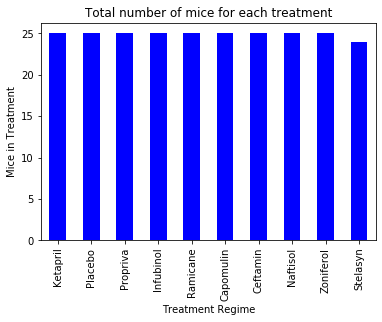

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Dmice=csmice_df[["Mouse ID","Drug Regimen"]]
dgmice=Dmice.drop_duplicates(keep="first")

dfbmice=dgmice["Drug Regimen"].value_counts()
dfbmice.plot(kind="bar", facecolor="blue", title="Total number of mice for each treatment")
plt.xlabel("Treatment Regime")
plt.ylabel("Mice in Treatment")


Text(0, 0.5, 'Mice in Treatment')

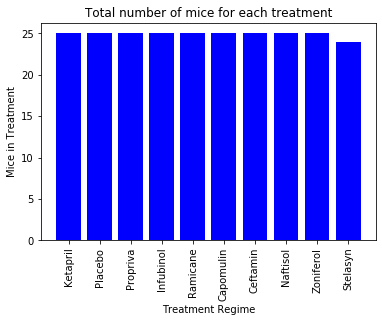

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Dmice=csmice_df[["Mouse ID","Drug Regimen"]]
dgmice=Dmice.drop_duplicates(keep="first")

lmice=list(dgmice["Drug Regimen"].value_counts())
lmice
Reg=dgmice["Drug Regimen"].value_counts().keys()
Reg
xb_axis=np.arange(len(Reg))
yb_axis=lmice

tick_locations = [value for value in xb_axis]
plt.xticks(tick_locations, Reg)
plt.xticks(rotation=90)
plt.bar(xb_axis, yb_axis,color="b", align="center")



plt.title("Total number of mice for each treatment")
plt.xlabel("Treatment Regime")
plt.ylabel("Mice in Treatment")

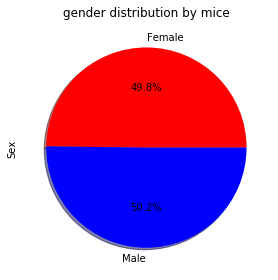

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gmice=csmice_df[["Mouse ID","Sex"]]
cgmice=gmice.drop_duplicates(keep="first")
cgsmice=cgmice.groupby("Sex")
genc=cgsmice["Sex"].count()
gench = genc.plot(kind='pie', autopct="%1.1f%%", title="gender distribution by mice", shadow=True, colors=["r","b"])
plt.tight_layout()

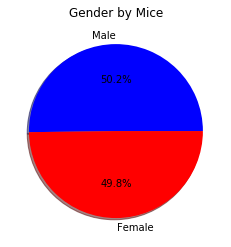

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=list(cgmice["Sex"].unique())

members=[cgmice.loc[cgmice["Sex"]==x,"Sex"].count() for x in labels]
colors=["b","r"]

plt.pie(members, labels=labels, colors=colors,shadow=True,autopct="%1.1f%%")
plt.title('Gender by Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
Timedf=csmice_df[['Mouse ID', 'Timepoint']]
gtime = Timedf.groupby('Mouse ID')
ltime=gtime.max()
ltime=ltime.reset_index()
mice=ltime["Mouse ID"]

In [17]:
ltmice_df=pd.merge(csmice_df,ltime, on="Mouse ID",how="outer", suffixes=("", "Last"))
ltmice_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,TimepointLast
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [18]:
timepoint_df=ltmice_df.loc[(ltmice_df["Timepoint"]==ltmice_df["TimepointLast"])]
timepoint_df=timepoint_df.reset_index()
ind=timepoint_df["Mouse ID"].keys()
ind

RangeIndex(start=0, stop=249, step=1)

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treat=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
 # Locate the rows which contain mice on each drug and get the tumor volumes
for x in ind:
    if timepoint_df.iloc[x,2]==treat[0]:
        tumorvol.append(timepoint_df.iloc[x,7])
    elif timepoint_df.iloc[x,2]==treat[1]:
        tumorvol.append(timepoint_df.iloc[x,7])
    elif timepoint_df.iloc[x,2]==treat[2]:
        tumorvol.append(timepoint_df.iloc[x,7])
    elif timepoint_df.iloc[x,2]==treat[3]:
        tumorvol.append(timepoint_df.iloc[x,7])


    
# add subset 
tumor=pd.Series(tumorvol)
quartiles = tumor.quantile([.25,.5,.75])
lq = quartiles[0.25]
uq = quartiles[0.75]
iqr = uq-lq
upperbound=uq+1.5*iqr
lowerbound=lq-1.5*iqr

outliers=[x for x in tumorvol if (x  > upperbound) | (x < lowerbound)]
outliers
    # Determine outliers using upper and lower bounds


[]

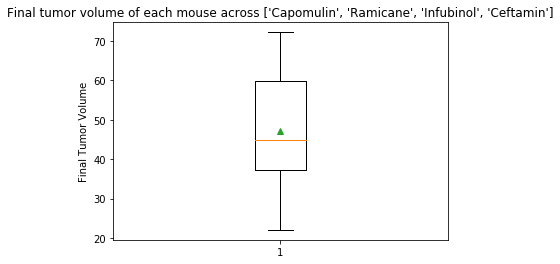

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title(f'Final tumor volume of each mouse across {treat}')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumorvol, showmeans=True)
plt.show()



## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


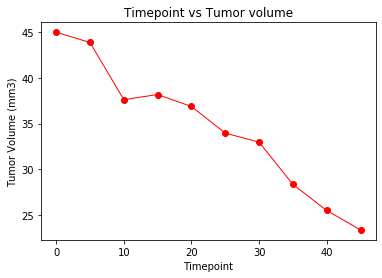

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cam_df=csmice_df.loc[csmice_df["Mouse ID"]=='s185']
xc_axis=cam_df["Timepoint"]
yc_axis=cam_df["Tumor Volume (mm3)"]
plt.plot(xc_axis, yc_axis,marker="o", color="red", linewidth=1)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Timepoint vs Tumor volume")
cam_df.head()

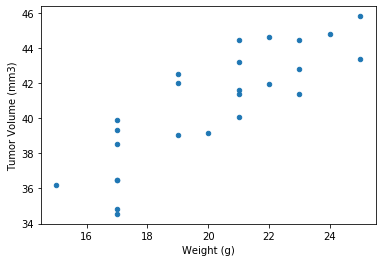

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df=csmice_df.loc[csmice_df["Drug Regimen"]=='Capomulin']
gcap_df=cap_df.groupby("Mouse ID")
acap_df=gcap_df.mean()
acap_df.plot(kind ="scatter",x="Weight (g)",y="Tumor Volume (mm3)")


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Weight=acap_df["Weight (g)"]
Tumor_Volume=acap_df["Tumor Volume (mm3)"]
Correlation=st.pearsonr(Weight, Tumor_Volume)
Correlation[0]

0.8419363424694717

The r-squared is 0.7088568047708717


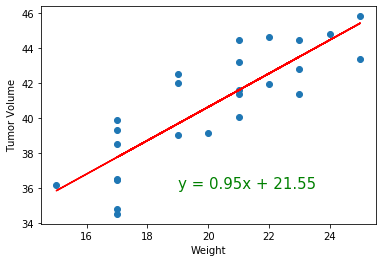

In [26]:

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Weight, Tumor_Volume)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Weight,Tumor_Volume)
plt.plot(Weight,regress_values,"r")
plt.annotate(line_eq,(19,36),fontsize=15,color="green")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')

print(f"The r-squared is {rvalue**2}")
plt.show()